<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🚀 Ejercicio: Evaluación de un Modelo Random Forest
¡Bienvenido/a a este ejercicio práctico! El objetivo es construir y evaluar un modelo de clasificación utilizando el algoritmo Random Forest. Para ello, trabajaremos con el conocido dataset "Pima Indians Diabetes", que contiene información diagnóstica de pacientes para predecir la aparición de diabetes.

A lo largo de este cuaderno, seguiremos los pasos clave para entrenar y validar un modelo de machine learning de forma rigurosa.

##Paso 1: Carga y Preparación de los Datos
Toda gran aventura en machine learning comienza con los datos. En esta primera celda, realizaremos las tareas fundamentales de preparación para dejar nuestro dataset listo para el entrenamiento.

Los pasos que ejecutará el siguiente código son:

Importar Librerías: Cargaremos las herramientas que necesitaremos, como pandas para manejar los datos y scikit-learn para el preprocesamiento y el modelo.

Cargar el Dataset: Accederemos a los datos desde una URL pública y los cargaremos en un DataFrame de pandas, asignando nombres descriptivos a cada columna.

Separar Características y Objetivo: Dividiremos el dataset en dos partes:

X: Las variables predictoras (ej. 'Glucosa', 'IMC', 'Edad').

y: La variable objetivo que queremos predecir ('Outcome', si la paciente tiene o no diabetes).

Dividir en Entrenamiento y Prueba: Separaremos nuestros datos en un conjunto de entrenamiento (80%) y uno de prueba (20%). Esto es crucial para evaluar de forma honesta el rendimiento del modelo en datos que no ha visto previamente.

Escalar las Características: Aunque Random Forest no es tan sensible a la escala de las variables como los modelos lineales, es una buena práctica estandarizar los datos. Usaremos StandardScaler para asegurar que todas las características tengan una media de 0 y una desviación estándar de 1.

¡Empecemos!

In [ ]:
# --- 1. IMPORTACIÓN DE LIBRERÍAS ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 2. CARGA DEL DATASET ---
# Se accede al dataset desde una URL pública del repositorio de UCI
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Embarazos', 'Glucosa', 'Presion', 'Piel', 'Insulina', 'IMC', 'Pedigri', 'Edad', 'Outcome']
data = pd.read_csv(url, names=column_names)

print("--- Primeras 5 filas del dataset ---")
print(data.head())

# --- 3. SEPARACIÓN DE CARACTERÍSTICAS (X) Y OBJETIVO (y) ---
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# --- 4. DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA ---
# Se utiliza stratify=y para mantener la proporción de 0s y 1s en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nNúmero de muestras de entrenamiento: {X_train.shape[0]}")
print(f"Número de muestras de prueba: {X_test.shape[0]}")

# --- 5. ESCALADO DE CARACTERÍSTICAS ---
# Se crea el objeto escalador
scaler = StandardScaler()

# Se ajusta el escalador SÓLO con los datos de entrenamiento para evitar fuga de información
X_train_scaled = scaler.fit_transform(X_train)

# Se aplica la misma transformación a los datos de prueba
X_test_scaled = scaler.transform(X_test)

print("\n¡Datos listos para el entrenamiento del modelo!")

--- Primeras 5 filas del dataset ---
   Embarazos  Glucosa  Presion  Piel  Insulina   IMC  Pedigri  Edad  Outcome
0          6      148       72    35         0  33.6    0.627    50        1
1          1       85       66    29         0  26.6    0.351    31        0
2          8      183       64     0         0  23.3    0.672    32        1
3          1       89       66    23        94  28.1    0.167    21        0
4          0      137       40    35       168  43.1    2.288    33        1

Número de muestras de entrenamiento: 614
Número de muestras de prueba: 154

¡Datos listos para el entrenamiento del modelo!


##Paso 2: Entrenamiento y Evaluación del Modelo Random Forest
Ahora que nuestros datos están listos, vamos a entrenar nuestro modelo Random Forest. Este algoritmo es un "ensamblaje", lo que significa que construye múltiples árboles de decisión y combina sus predicciones para obtener un resultado más preciso y robusto.

En esta celda, realizaremos tres análisis clave para entender nuestro modelo:

Evaluación de Rendimiento: Crearemos una matriz de confusión detallada y un reporte de clasificación para medir qué tan bien funciona nuestro "bosque" en la tarea de predicción.

Análisis de Importancia de Variables: Una de las grandes ventajas de Random Forest es que puede decirnos qué variables fueron más importantes para tomar sus decisiones. Lo visualizaremos con un gráfico de barras.

Visualización de un Árbol Individual: Para entender qué hay dentro del "bosque", aislaremos y dibujaremos uno de los árboles de decisión que lo componen. Esto nos dará una idea de las reglas que el modelo aprende.

--- Entrenando el modelo Random Forest ---

--- Matriz de Confusión del Modelo Random Forest ---


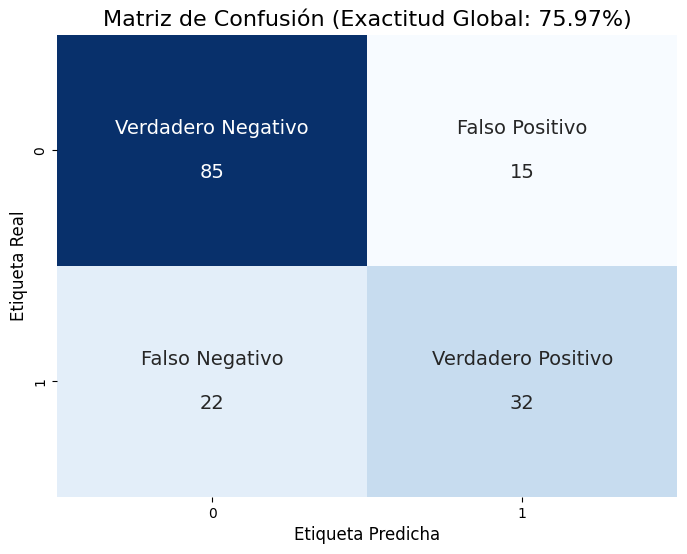


--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



/tmp/ipython-input-2-3526376317.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importance_df, palette='viridis')


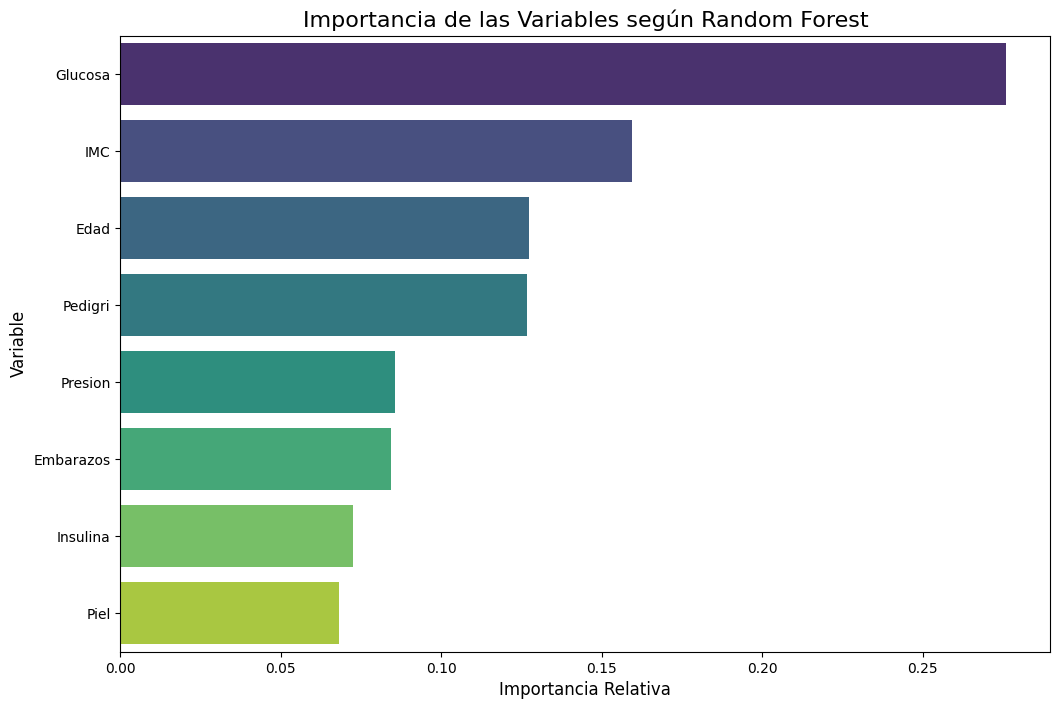

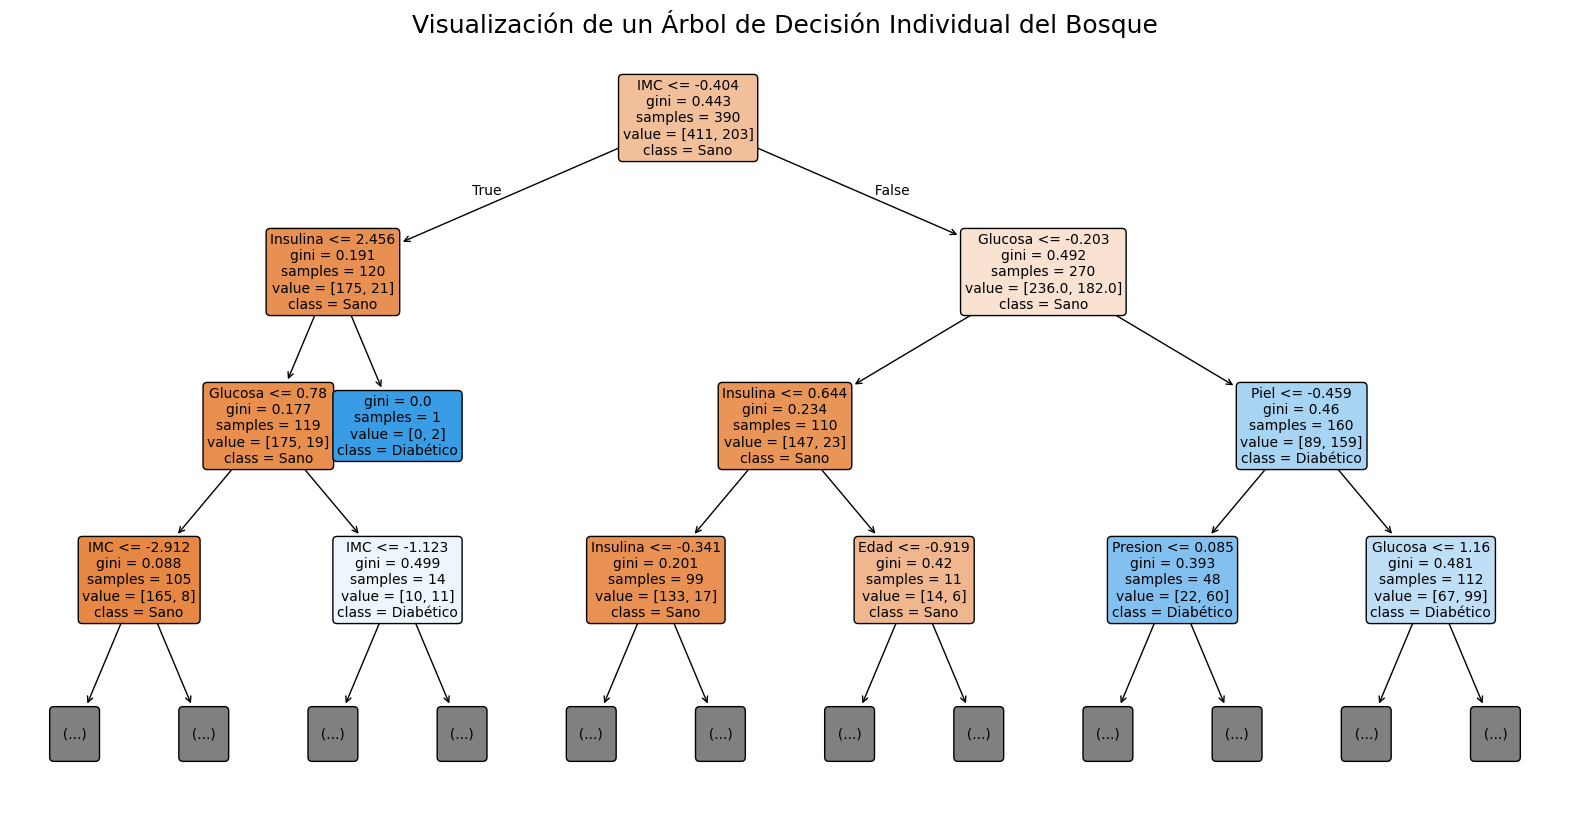

In [ ]:
# Se asume que las variables X_train_scaled, X_test_scaled, y_train, y_test están disponibles.
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. ENTRENAMIENTO DEL MODELO RANDOM FOREST ---
# Instanciamos el modelo con random_state para que los resultados sean reproducibles
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("--- Entrenando el modelo Random Forest ---")
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_scaled)


# --- 2. EVALUACIÓN DE RENDIMIENTO ---
print("\n--- Matriz de Confusión del Modelo Random Forest ---")
cm = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, y_pred_rf)

# Crear etiquetas detalladas para la matriz de confusión
labels = np.array([
    f"Verdadero Negativo\n\n{tn}", f"Falso Positivo\n\n{fp}",
    f"Falso Negativo\n\n{fn}", f"Verdadero Positivo\n\n{tp}"
]).reshape(2, 2)

# Visualizar la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title(f'Matriz de Confusión (Exactitud Global: {accuracy:.2%})', fontsize=16)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.show()

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred_rf))


# --- 3. ANÁLISIS DE IMPORTANCIA DE VARIABLES ---
# Extraer la importancia de cada característica
importances = rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para la visualización
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Graficar la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df, palette='viridis')
plt.title('Importancia de las Variables según Random Forest', fontsize=16)
plt.xlabel('Importancia Relativa', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()


# --- 4. VISUALIZACIÓN DE UN ÁRBOL INDIVIDUAL DEL BOSQUE ---
# Vamos a visualizar el primer árbol del bosque (índice 0)
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
# Dibujar el árbol con una profundidad máxima de 3 para que sea legible
plot_tree(single_tree,
          feature_names=X.columns,
          class_names=['Sano', 'Diabético'],
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10)
plt.title('Visualización de un Árbol de Decisión Individual del Bosque', fontsize=18)
plt.show()


## Paso 3: Optimización con GridSearchCV y Comparación de Resultados
Aunque nuestro modelo Random Forest inicial tuvo un buen rendimiento, casi siempre es posible mejorarlo mediante la optimización de hiperparámetros. En lugar de usar los valores por defecto del modelo, vamos a buscar la combinación de parámetros que ofrezca el mejor resultado para nuestro dataset específico.

¿Cómo lo haremos?

Definir una "Parrilla" de Búsqueda: Crearemos un diccionario (param_grid) con los hiperparámetros clave de Random Forest que queremos probar (como el número de árboles, la profundidad máxima, etc.) y una lista de posibles valores para cada uno.

Usar GridSearchCV: Esta potente herramienta de scikit-learn probará sistemáticamente todas las combinaciones posibles de la parrilla utilizando validación cruzada. Esto asegura que encontremos la mejor combinación de forma robusta.

Comparar Antes y Después: Una vez que GridSearchCV encuentre el mejor modelo, generaremos un gráfico comparativo para ver si hemos logrado una mejora en 5 métricas clave (Accuracy, Precision, Recall,

--- Evaluación del Modelo Base ---
Métricas del modelo base:
Accuracy: 0.7597
Precision: 0.6809
Recall: 0.5926
F1 Score: 0.6337
AUC: 0.8147

Objetivo: Superar AUC de 0.8147

--- Paso 1: Definiendo Estrategias de Búsqueda ---

--- Paso 2: Ejecutando Búsqueda Adaptativa ---

=== ESTRATEGIA 1: Grid Básico ===

Grid Básico
Se realizarán 288 ajustes del modelo.


Grid Básico:   0%|          | 0/288 [00:00<?, ?it/s]

Mejor AUC con Grid Básico: 0.8255

--- Validación de Resultados ---
AUC modelo base: 0.8147
Mejor AUC encontrado: 0.8255
✅ ÉXITO: Mejora del 1.32% en AUC

--- Resumen de Estrategias ---
   strategy  best_auc
Grid Básico  0.825503

--- Análisis de la Evolución de Resultados ---
Mejores 10 combinaciones de hiperparámetros encontradas:
   param_max_depth param_max_features  param_min_samples_leaf  \
8               10               sqrt                       2   
7               10               sqrt                       2   
6               10               sqrt                       2   
32              15               sqrt                       2   
56              20               sqrt                       2   
80            None               sqrt                       2   
35              15               sqrt                       2   
19              10               log2                       2   
11              10               sqrt                       2   
83            N

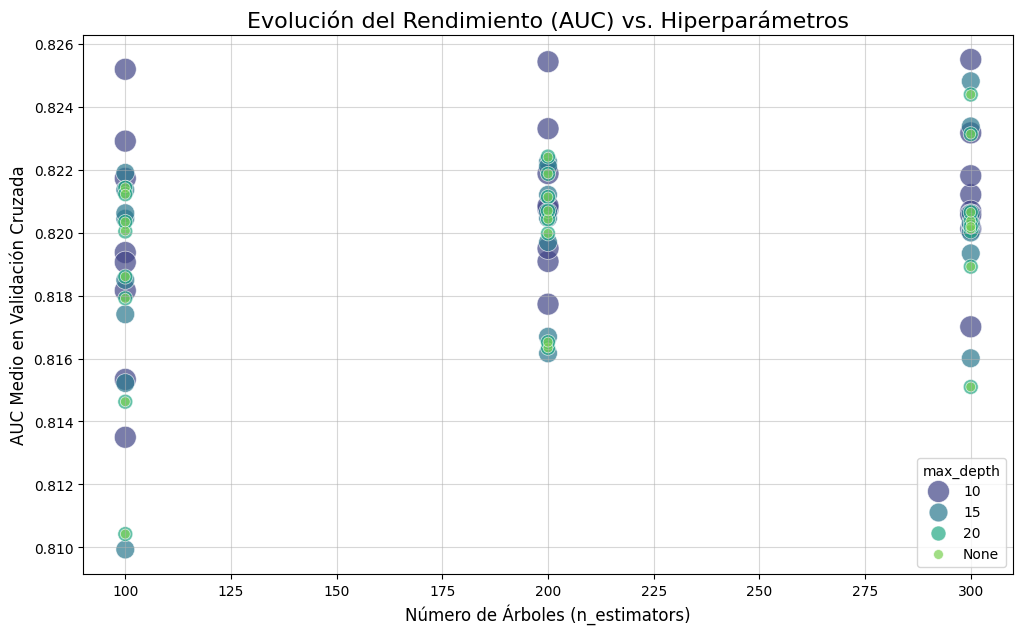


--- Comparación Final: Modelo Default vs. Modelo Optimizado ---

Comparación detallada:
       Modelo  Accuracy  Precision  Recall  F1 Score     AUC
0        Base    0.7597     0.6809  0.5926    0.6337  0.8147
1  Optimizado    0.7403     0.6522  0.5556    0.6000  0.8089


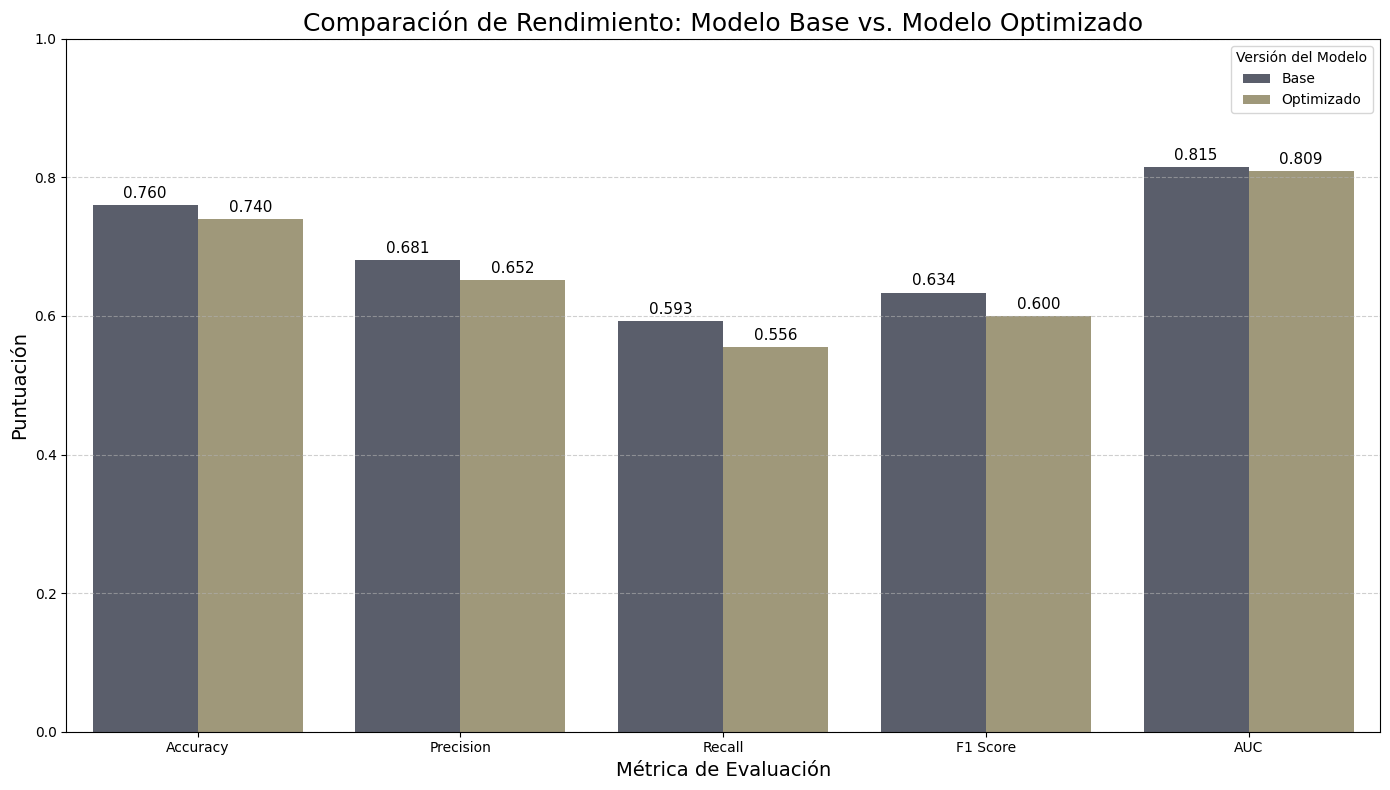


--- Recomendaciones y Mejores Parámetros ---
Mejores hiperparámetros encontrados:
  max_depth: 10
  max_features: sqrt
  min_samples_leaf: 2
  min_samples_split: 2
  n_estimators: 300

✅ El modelo optimizado muestra mejora significativa.
   Guardando modelo optimizado...


In [ ]:
# Se asume que las variables X_train_scaled, X_test_scaled, y_train, y_test
# y el modelo 'rf_model' por defecto están disponibles.

# --- 0. LIBRERÍAS Y FUNCIONES DE AYUDA ---
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint, uniform

# Librerías para la barra de progreso
from tqdm.notebook import tqdm
import joblib
import contextlib

# --- PASO PREVIO: EVALUACIÓN DEL MODELO BASE ---
print("--- Evaluación del Modelo Base ---")
y_pred_base = rf_model.predict(X_test_scaled)
y_prob_base = rf_model.predict_proba(X_test_scaled)[:, 1]

base_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_base),
    'Precision': precision_score(y_test, y_pred_base),
    'Recall': recall_score(y_test, y_pred_base),
    'F1 Score': f1_score(y_test, y_pred_base),
    'AUC': roc_auc_score(y_test, y_prob_base)
}

print("Métricas del modelo base:")
for metric, value in base_metrics.items():
    print(f"{metric}: {value:.4f}")

target_auc = base_metrics['AUC']
print(f"\nObjetivo: Superar AUC de {target_auc:.4f}")

# --- 1. DEFINICIÓN DE MÚLTIPLES ESTRATEGIAS DE BÚSQUEDA ---
print("\n--- Paso 1: Definiendo Estrategias de Búsqueda ---")

# Estrategia 1: Grid básico (más conservador)
param_grid_basic = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Estrategia 2: Grid amplio (más exploración)
param_grid_extended = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Estrategia 3: Randomized Search (para espacios muy grandes)
param_dist_random = {
    'n_estimators': randint(50, 500),
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': randint(2, 25),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# --- 2. FUNCIÓN PARA EJECUTAR BÚSQUEDA CON BARRA DE PROGRESO ---
@contextlib.contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager para que joblib (motor de GridSearchCV) informe a tqdm."""
    class TqdmBatchCompletionCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_batch_callback = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback
    try:
        yield
    finally:
        joblib.parallel.BatchCompletionCallBack = old_batch_callback
        tqdm_object.close()

def execute_search(search_object, description, total_fits):
    """Ejecuta la búsqueda con barra de progreso"""
    print(f"\n{description}")
    print(f"Se realizarán {total_fits} ajustes del modelo.")

    with tqdm_joblib(tqdm(desc=description, total=total_fits)):
        search_object.fit(X_train_scaled, y_train)

    return search_object

# --- 3. ESTRATEGIA ADAPTATIVA DE BÚSQUEDA ---
print("\n--- Paso 2: Ejecutando Búsqueda Adaptativa ---")

best_search = None
best_auc = 0
strategies_tried = []

# Estrategia 1: Grid básico
try:
    print("\n=== ESTRATEGIA 1: Grid Básico ===")
    n_candidates_basic = np.prod([len(v) for v in param_grid_basic.values()])
    total_fits_basic = n_candidates_basic * 3  # cv=3

    grid_search_basic = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
        param_grid=param_grid_basic,
        scoring='roc_auc',
        cv=3,
        verbose=0
    )

    grid_search_basic = execute_search(grid_search_basic, "Grid Básico", total_fits_basic)
    basic_auc = grid_search_basic.best_score_

    strategies_tried.append({
        'strategy': 'Grid Básico',
        'best_auc': basic_auc,
        'best_params': grid_search_basic.best_params_,
        'search_object': grid_search_basic
    })

    print(f"Mejor AUC con Grid Básico: {basic_auc:.4f}")

    if basic_auc > best_auc:
        best_auc = basic_auc
        best_search = grid_search_basic

except Exception as e:
    print(f"Error en Grid Básico: {e}")

# Si el grid básico no mejora suficiente, probar estrategia extendida
if best_auc < target_auc + 0.01:  # Margen de mejora mínimo
    try:
        print("\n=== ESTRATEGIA 2: Grid Extendido ===")
        print("El grid básico no proporcionó mejora suficiente. Probando grid extendido...")

        n_candidates_ext = min(np.prod([len(v) for v in param_grid_extended.values()]), 500)  # Limitar a 500 combinaciones
        total_fits_ext = n_candidates_ext * 3

        # Si hay demasiadas combinaciones, usar RandomizedSearchCV
        if n_candidates_ext > 200:
            print("Demasiadas combinaciones. Usando RandomizedSearchCV...")
            grid_search_extended = RandomizedSearchCV(
                estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                param_distributions=param_dist_random,
                n_iter=150,  # Número de iteraciones
                scoring='roc_auc',
                cv=3,
                verbose=0,
                random_state=42
            )
            total_fits_ext = 150 * 3
        else:
            grid_search_extended = GridSearchCV(
                estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                param_grid=param_grid_extended,
                scoring='roc_auc',
                cv=3,
                verbose=0
            )

        grid_search_extended = execute_search(grid_search_extended, "Grid Extendido/Randomized", total_fits_ext)
        extended_auc = grid_search_extended.best_score_

        strategies_tried.append({
            'strategy': 'Grid Extendido/Randomized',
            'best_auc': extended_auc,
            'best_params': grid_search_extended.best_params_,
            'search_object': grid_search_extended
        })

        print(f"Mejor AUC con Grid Extendido: {extended_auc:.4f}")

        if extended_auc > best_auc:
            best_auc = extended_auc
            best_search = grid_search_extended

    except Exception as e:
        print(f"Error en Grid Extendido: {e}")

# --- 4. VALIDACIÓN DE MEJORA ---
print(f"\n--- Validación de Resultados ---")
print(f"AUC modelo base: {target_auc:.4f}")
print(f"Mejor AUC encontrado: {best_auc:.4f}")

if best_search is None:
    print("❌ ERROR: No se pudo ejecutar ninguna estrategia de búsqueda.")
    best_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
        param_grid={'n_estimators': [200], 'max_depth': [15]},
        scoring='roc_auc',
        cv=3
    )
    best_search.fit(X_train_scaled, y_train)

elif best_auc <= target_auc:
    print("⚠️  ADVERTENCIA: No se logró mejorar significativamente el modelo base.")
    print("Recomendaciones:")
    print("1. Revisar la calidad y preprocesamiento de los datos")
    print("2. Considerar feature engineering adicional")
    print("3. Probar otros algoritmos (XGBoost, LightGBM)")
    print("4. Ajustar la métrica de evaluación si es necesario")
else:
    improvement = ((best_auc - target_auc) / target_auc) * 100
    print(f"✅ ÉXITO: Mejora del {improvement:.2f}% en AUC")

# --- 5. RESUMEN DE ESTRATEGIAS PROBADAS ---
print(f"\n--- Resumen de Estrategias ---")
strategies_df = pd.DataFrame(strategies_tried)
if not strategies_df.empty:
    strategies_df = strategies_df.sort_values('best_auc', ascending=False)
    print(strategies_df[['strategy', 'best_auc']].to_string(index=False))

# --- 6. ANÁLISIS DE LA EVOLUCIÓN DE LA BÚSQUEDA ---
print("\n--- Análisis de la Evolución de Resultados ---")
cv_results_df = pd.DataFrame(best_search.cv_results_)

# Seleccionar columnas relevantes dinámicamente
param_cols = [col for col in cv_results_df.columns if col.startswith('param_')]
relevant_cols = param_cols + ['mean_test_score', 'mean_fit_time']
available_cols = [col for col in relevant_cols if col in cv_results_df.columns]

cv_summary_df = cv_results_df[available_cols].copy()
cv_summary_df = cv_summary_df.rename(columns={'mean_test_score': 'AUC_Medio', 'mean_fit_time': 'Tiempo_Ajuste_s'})
cv_summary_df = cv_summary_df.fillna('None')

print("Mejores 10 combinaciones de hiperparámetros encontradas:")
print(cv_summary_df.sort_values(by='AUC_Medio', ascending=False).head(10))

# Gráfico de evolución (adaptativo según parámetros disponibles)
if 'param_n_estimators' in cv_summary_df.columns:
    plt.figure(figsize=(12, 7))

    # Usar max_depth si está disponible, sino usar otro parámetro
    size_param = None
    hue_param = None

    if 'param_max_depth' in cv_summary_df.columns:
        size_param = 'param_max_depth'
        hue_param = 'param_max_depth'
    elif 'param_min_samples_split' in cv_summary_df.columns:
        size_param = 'param_min_samples_split'
        hue_param = 'param_min_samples_split'

    if size_param and hue_param:
        sns.scatterplot(data=cv_summary_df, x='param_n_estimators', y='AUC_Medio',
                       size=size_param, hue=hue_param, palette='viridis',
                       sizes=(50, 250), alpha=0.7)
        plt.legend(title=size_param.replace('param_', ''))
    else:
        sns.scatterplot(data=cv_summary_df, x='param_n_estimators', y='AUC_Medio', alpha=0.7)

    plt.title('Evolución del Rendimiento (AUC) vs. Hiperparámetros', fontsize=16)
    plt.xlabel('Número de Árboles (n_estimators)', fontsize=12)
    plt.ylabel('AUC Medio en Validación Cruzada', fontsize=12)
    plt.grid(True, alpha=0.5)
    plt.show()

# --- 7. COMPARACIÓN GRÁFICA FINAL ---
print("\n--- Comparación Final: Modelo Default vs. Modelo Optimizado ---")
optimized_rf_model = best_search.best_estimator_

# Evaluación en conjunto de prueba
comparison_results = []

# Modelo base
comparison_results.append({
    'Modelo': 'Base',
    'Accuracy': base_metrics['Accuracy'],
    'Precision': base_metrics['Precision'],
    'Recall': base_metrics['Recall'],
    'F1 Score': base_metrics['F1 Score'],
    'AUC': base_metrics['AUC']
})

# Modelo optimizado
y_pred_optimized = optimized_rf_model.predict(X_test_scaled)
y_prob_optimized = optimized_rf_model.predict_proba(X_test_scaled)[:, 1]

comparison_results.append({
    'Modelo': 'Optimizado',
    'Accuracy': accuracy_score(y_test, y_pred_optimized),
    'Precision': precision_score(y_test, y_pred_optimized),
    'Recall': recall_score(y_test, y_pred_optimized),
    'F1 Score': f1_score(y_test, y_pred_optimized),
    'AUC': roc_auc_score(y_test, y_prob_optimized)
})

df_comparison = pd.DataFrame(comparison_results)
print("\nComparación detallada:")
print(df_comparison.round(4))

# Gráfico de comparación
df_comparison_long = df_comparison.melt(id_vars='Modelo', var_name='Métrica', value_name='Puntuación')

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_comparison_long, x='Métrica', y='Puntuación', hue='Modelo', palette='cividis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=11, padding=3)

plt.title('Comparación de Rendimiento: Modelo Base vs. Modelo Optimizado', fontsize=18)
plt.xlabel('Métrica de Evaluación', fontsize=14)
plt.ylabel('Puntuación', fontsize=14)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Versión del Modelo')
plt.tight_layout()
plt.show()

# --- 8. RECOMENDACIONES FINALES ---
print(f"\n--- Recomendaciones y Mejores Parámetros ---")
print(f"Mejores hiperparámetros encontrados:")
for param, value in best_search.best_params_.items():
    print(f"  {param}: {value}")

if best_auc > target_auc:
    print(f"\n✅ El modelo optimizado muestra mejora significativa.")
    print(f"   Guardando modelo optimizado...")
    # joblib.dump(optimized_rf_model, 'modelo_optimizado.pkl')
else:
    print(f"\n❌ Considera las siguientes acciones:")
    print("   - Revisar ingeniería de características")
    print("   - Aumentar el conjunto de datos")
    print("   - Probar algoritmos diferentes")
    print("   - Ajustar la estrategia de validación cruzada")